In [6]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta

from scipy.stats import t as t_dist
from scipy.stats import norm
from scipy.stats import chi2_contingency

from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler


from sklearn.tree import DecisionTreeRegressor as DT
from sklearn.ensemble import RandomForestRegressor as RF


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
## global variables


In [8]:
##script functions

In [10]:
data = pd.read_csv("C:/Users/shashank malik/Desktop/ML ALGORITHMS/linear regression/advertising.csv")

In [11]:
#checking shape
data.shape

(200, 5)

In [12]:
#data explore
data.head()

,TV,Radio,Newspaper,STATE,Sales
0,230.1,37.8,69.2,DELHI,22.1
1,44.5,39.3,45.1,CHENNAI,10.4
2,17.2,45.9,69.3,CHENNAI,12.0
3,151.5,41.3,58.5,DELHI,16.5
4,180.8,10.8,58.4,KOLKATA,17.9


In [14]:
#data.schema
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   STATE      190 non-null    object 
 4   Sales      200 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.9+ KB


In [15]:
#stastical approach
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [17]:
#checking for null values
data.isnull().sum()

TV            0
Radio         0
Newspaper     0
STATE        10
Sales         0
dtype: int64

In [18]:
#how much percentage a null value is according to data
data.isnull().sum()/data.shape[0]*100

TV           0.0
Radio        0.0
Newspaper    0.0
STATE        5.0
Sales        0.0
dtype: float64

In [22]:
## missing value treatment
## mode for categorical
## median- preferably or mean (not prefered) for numerical

state_mode = data['STATE'].mode()
print(state_mode)
print(state_mode.values)

data.loc[pd.isna(data['STATE'])]

0    KOLKATA
Name: STATE, dtype: object
['KOLKATA']


,TV,Radio,Newspaper,STATE,Sales
190,39.5,41.1,5.8,NaN,10.8
191,75.5,10.8,6.0,NaN,11.9
192,17.2,4.1,31.6,NaN,5.9
193,166.8,42.0,3.6,NaN,19.6
194,149.7,35.6,6.0,NaN,17.3
195,38.2,3.7,13.8,NaN,7.6
196,94.2,4.9,8.1,NaN,14.0
197,177.0,9.3,6.4,NaN,14.8
198,283.6,42.0,66.2,NaN,25.5
199,232.1,8.6,8.7,NaN,18.4


In [23]:
data.loc[pd.isna(data['STATE']),"STATE"] = data["STATE"].mode().values[0]

In [24]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
STATE        0
Sales        0
dtype: int64

# EXPLORATORY DATA ANALYSIS

### UNIVARIATE

numerical

categorical

### BIVARIATE

numerical vs numerical

categorical vs categorical

numerical vs categorical

### MULTIVARIATE
more than 2 columns are used for analysis

# UNIVARIATE ANALYSIS

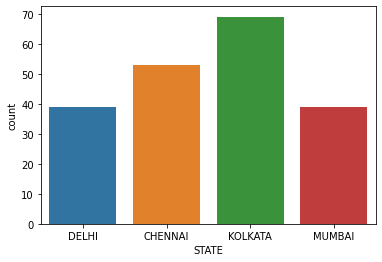

In [26]:
# state
sns.countplot(x = data['STATE'],data=data)
plt.show()

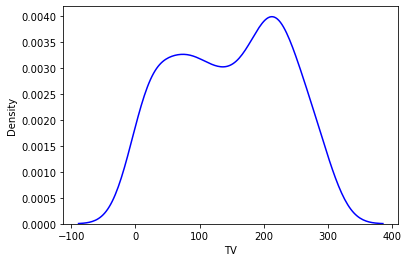

In [29]:
#TV
sns.kdeplot(x = data['TV'],data = data,color='blue')
plt.show()

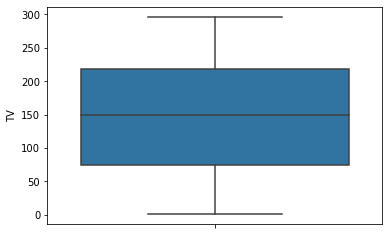

In [31]:
sns.boxplot(y=data['TV'])
plt.show()

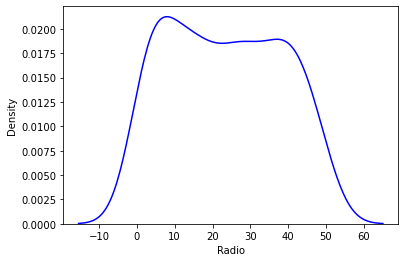

In [32]:
#radio
sns.kdeplot(x = data['Radio'],data = data,color='blue')
plt.show()

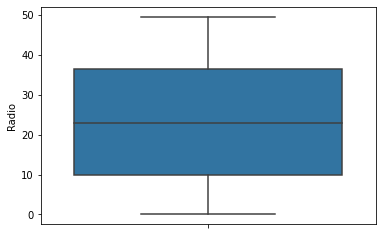

In [33]:
sns.boxplot(y=data['Radio'])
plt.show()

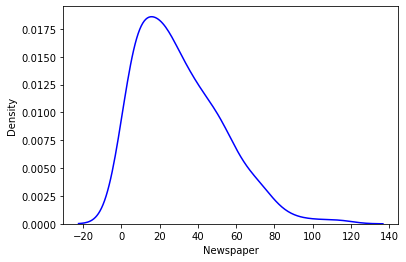

In [34]:
#Newspaper
sns.kdeplot(x = data['Newspaper'],data = data,color='blue')
plt.show()

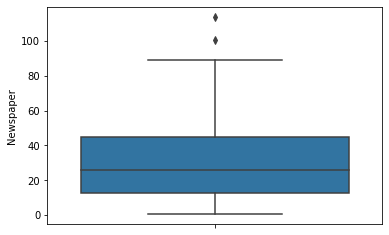

In [35]:
sns.boxplot(y=data['Newspaper'])
plt.show()

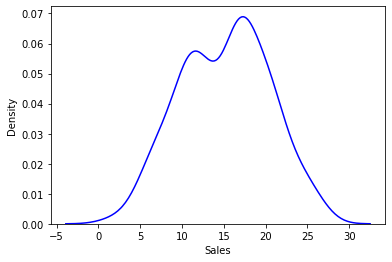

In [36]:
#sales
sns.kdeplot(x = data['Sales'],data = data,color='blue')
plt.show()

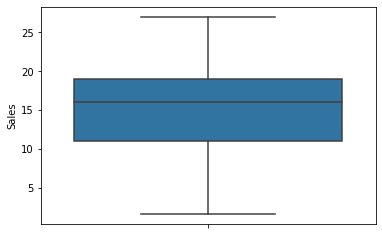

In [37]:
sns.boxplot(y=data['Sales'])
plt.show()

# BIVARIATE ANALYSIS

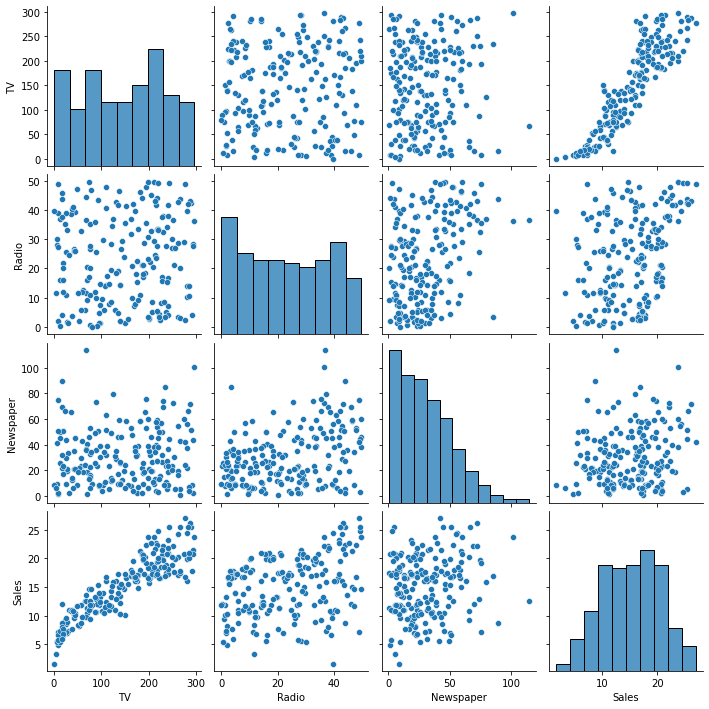

In [38]:
#pairplot
sns.pairplot(data)

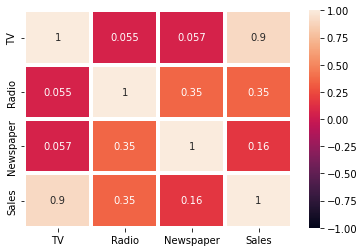

In [40]:
#heatmap
corr = data.corr()
sns.heatmap(corr,linewidths = 4,vmin=-1,vmax=1,annot = True)
plt.show()

In [41]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


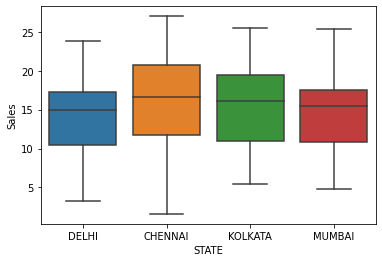

In [42]:
# numerical and category bivariate analysis

sns.boxplot(x = 'STATE', y ='Sales' , data = data)
plt.show()

In [45]:
data[data["STATE"]=="CHENNAI"]["Sales"].mean(),data[data["STATE"]!="CHENNAI"]["Sales"].mean()

(16.17169811320755, 14.755102040816327)

# EDA REPORT

### 
-Sales in highly positivle correlated with TV

-Chennai shows lowest and highest sales in comparison to other states

# MODELLING

In [49]:
x = data[['TV' , 'Radio' , 'Newspaper' , 'STATE']]
y = data['Sales']
print(x.shape,y.shape)
print(type(y))

(200, 4) (200,)
<class 'pandas.core.series.Series'>


In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(140, 4) (140,) (60, 4) (60,)


In [52]:
## dummy / one hot encoding

x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)

x_train.shape, x_test.shape

((140, 6), (60, 6))

In [53]:
x_train

,TV,Radio,Newspaper,STATE_DELHI,STATE_KOLKATA,STATE_MUMBAI
74,213.4,24.6,13.1,1,0,0
3,151.5,41.3,58.5,1,0,0
185,205.0,45.1,19.6,0,0,1
26,142.9,29.3,12.6,0,0,0
90,134.3,4.9,9.3,0,0,0
...,...,...,...,...,...,...
87,110.7,40.6,63.2,0,1,0
103,187.9,17.2,17.9,0,0,0
67,139.3,14.5,10.2,1,0,0
24,62.3,12.6,18.3,0,0,0


In [54]:
## normalization

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# fit - numerical columns min and max value extract
# transform - min max values, tranform
# fit_transform - 

scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

x_train_scaled.shape, x_test_scaled.shape

((140, 6), (60, 6))

In [55]:
x_train_scaled.isnull().sum()

TV               0
Radio            0
Newspaper        0
STATE_DELHI      0
STATE_KOLKATA    0
STATE_MUMBAI     0
dtype: int64

In [56]:
# Let's fit the regression line following exactly the same steps as done before
import statsmodels.api as sm

x_train_scaled_sm = sm.add_constant(x_train_scaled)

lr_scaled = sm.OLS(y_train.values.reshape(-1,1), x_train_scaled_sm).fit()

In [57]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr_scaled.params

const             4.899012
TV               15.809110
Radio             5.288092
Newspaper         1.071173
STATE_DELHI      -1.067773
STATE_KOLKATA    -0.551364
STATE_MUMBAI     -0.369662
dtype: float64

In [58]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     237.2
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.78e-68
Time:                        17:56:46   Log-Likelihood:                -267.37
No. Observations:                 140   AIC:                             548.7
Df Residuals:                     133   BIC:                             569.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8990      0.449     10.904

In [59]:
x_train_scaled = x_train_scaled.drop(columns=["STATE_MUMBAI"])

x_train_scaled_sm = sm.add_constant(x_train_scaled)

lr_scaled = sm.OLS(y_train.values.reshape(-1,1), x_train_scaled_sm).fit()

print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     285.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.38e-69
Time:                        17:58:35   Log-Likelihood:                -267.71
No. Observations:                 140   AIC:                             547.4
Df Residuals:                     134   BIC:                             565.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7130      0.385     12.244

In [60]:
x_train_scaled = x_train_scaled.drop(columns=["Newspaper"])

x_train_scaled_sm = sm.add_constant(x_train_scaled)

lr_scaled = sm.OLS(y_train.values.reshape(-1,1), x_train_scaled_sm).fit()

print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     355.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.32e-70
Time:                        17:59:24   Log-Likelihood:                -268.39
No. Observations:                 140   AIC:                             546.8
Df Residuals:                     135   BIC:                             561.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.8064      0.377     12.762

In [61]:
x_train_scaled = x_train_scaled.drop(columns=["STATE_KOLKATA"])

x_train_scaled_sm = sm.add_constant(x_train_scaled)

lr_scaled = sm.OLS(y_train.values.reshape(-1,1), x_train_scaled_sm).fit()

print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     472.4
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           1.07e-71
Time:                        17:59:58   Log-Likelihood:                -269.06
No. Observations:                 140   AIC:                             546.1
Df Residuals:                     136   BIC:                             557.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.6505      0.352     13.230      

In [62]:
x_test_scaled_sm = sm.add_constant(x_test_scaled[x_train_scaled.columns])

predicted = lr_scaled.predict(x_test_scaled_sm)
true = y_test

In [63]:
predicted.values, true.values

(array([ 9.41942093, 20.61317595, 16.59193133, 20.10740874, 21.90657578,
        15.6415584 , 13.71727613, 15.64247019, 20.9621678 , 21.23179326,
        12.57833049, 20.60716662,  8.28032801, 17.09980541,  9.9489007 ,
        10.2352954 , 16.68442484, 14.65270173, 17.5624755 , 11.96361144,
        18.874618  , 12.21999931, 20.50856294, 17.90563129, 16.93244839,
        21.99529992, 20.22043209, 10.95476555, 19.51491464, 15.1400242 ,
        13.31247223,  8.6874363 , 12.0723888 , 16.79378344,  8.61199157,
        13.62441146,  9.3255612 , 14.47688455, 16.96594507, 16.39818078,
        18.86718388, 15.80577831, 15.13545686, 16.98158745, 13.29237255,
        10.55695975, 10.45049178, 21.05949354, 10.21689127,  7.08601347,
        18.02629465, 18.30931375, 12.60174176, 16.49531528, 19.27957841,
        11.43974723,  6.00088848, 10.38870558, 17.18757174, 13.26245777]),
 array([ 6.6, 20.7, 17.2, 19.4, 21.8, 17.2, 12.2, 16.7, 22.6, 22.3, 11.9,
        19.7,  8.7, 20.6, 10.6, 14. , 17.3, 16.7

In [64]:
x_test_scaled_sm["predicted sales"] = predicted
x_test_scaled_sm["true sales"] = true.values
x_test

,TV,Radio,Newspaper,STATE_DELHI,STATE_KOLKATA,STATE_MUMBAI
126,7.8,38.9,50.6,0,0,1
104,238.2,34.3,5.3,1,0,0
99,135.2,41.7,45.9,0,1,0
92,217.7,33.5,59.0,0,1,0
111,241.7,38.0,23.2,0,0,0
167,206.8,5.2,19.4,1,0,0
116,139.2,14.3,25.6,0,0,1
96,197.6,3.5,5.9,0,1,0
52,216.4,41.7,39.6,0,0,0
69,216.8,43.9,27.2,0,0,1


In [65]:
## evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## MAE
mae = np.mean(np.abs(true.values - predicted.values))
mae_sl = mean_absolute_error(true.values, predicted.values)

## MSE
mse = np.mean(np.square(true.values - predicted.values))

## RMSE
rmse = np.sqrt(np.mean(np.square(true.values - predicted.values)))

## RMSLE
rmsle = np.log(np.sqrt(np.mean(np.square(true.values - predicted.values))))

## R squared
r2 = r2_score(true.values, predicted.values)

## Adjusted R squared
n = true.shape[0]
k = x_test_scaled_sm.shape[1]
adj_r2_score = 1 - ((1 - r2)*(n - 1)/(n - k - 1))

print(mae, mae_sl, mse, rmse, rmsle, r2, (n,k,adj_r2_score))

1.233542931420157 1.233542931420157 2.7057065001847675 1.6449031886967596 0.49768153062942355 0.8620478100792506 (60, 6, 0.8464305810316186)


In [66]:
# current data : last 1 year data # data engineer
# modelling : linear regression (1 week) # data modelling
# Sales = 19 * TV + 5.5 * Radio -0.6 * STATE_DELHI + 4.6 | shared with business partners # data modelling
# 1 week data (new unseen data) (we don't have true values for sales) # managers
# to predict sales for last 1 week
# testing data -> x_test
# lr model predict : predictions

In [67]:
# Sales = 16 * TV + 5.5 * Radio -0.6 * STATE_DELHI + 4.6

In [68]:
## SKLEARN - LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

In [70]:
x_train_scaled.shape, y_train.shape, x_test_scaled.shape, y_test.shape

((140, 3), (140,), (60, 6), (60,))